In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# imported pands numpy and matplot labs so I can auto do charts etc when i need to use them!

In [3]:
orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [4]:
orders_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
product_df = pd.read_csv('/datasets/products.csv', sep=';')

In [6]:
product_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
aisle_df = pd.read_csv('/datasets/aisles.csv', sep=';')

In [8]:
aisle_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
department_df = pd.read_csv('/datasets/departments.csv', sep=';')

In [10]:
department_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')

In [12]:
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [13]:
# I imported all of the charts and displayed column layouts with the info aspect. I used sep= to get rid of the ; 
# that was showing up, and used show_counts 

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [14]:
# Check for duplicated orders
orders_duplicated = orders_df[orders_df.duplicated()]
orders_duplicated

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [15]:
# Check for all orders placed Wednesday at 2:00 AM
weds_morning = orders_df[orders_df['order_dow'] == 3]
weds_morning = weds_morning[weds_morning['order_hour_of_day'] == 2]
weds_morning

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [16]:
# Remove duplicate orders
orders_df = orders_df.drop_duplicates()

In [17]:
# Double check for duplicate rows

orders_drops_duplicates = orders_df.drop_duplicates()
orders_drops_duplicates

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [18]:
# Double check for duplicate order IDs only
order_id_duplicates = orders_df.duplicated(subset=['order_id']).sum()
print(order_id_duplicates)

0



# Missing information 
The order table had 15 rows of  duplicate values I cleaned up especially in the order_id column. I then checked specifically for the order id column of the table to eliminate the duplicates to get the most defined data 

### `products` data frame

In [19]:
# Check for fully duplicate rows
product_df.duplicated().sum()

0

In [20]:
# Check for just duplicate product IDs
product_df.duplicated(subset=['product_id']).sum()

0

In [21]:
# Check for just duplicate product names (convert names to lowercase to compare better)
product_df['product_name'].duplicated().sum()
product_df['product_name'].str.lower()

0                               chocolate sandwich cookies
1                                         all-seasons salt
2                     robust golden unsweetened oolong tea
3        smart ones classic favorites mini rigatoni wit...
4                                green chile anytime sauce
                               ...                        
49689                        high performance energy drink
49690                        original pancake & waffle mix
49691      organic instant oatmeal light maple brown sugar
49692                               spring water body wash
49693                              burrito- steak & cheese
Name: product_name, Length: 49694, dtype: object

In [22]:
# Check for duplicate product names that aren't missing
#product_name = product_df['product_name'].unique()
product_df['product_name'] = product_df['product_name'].str.lower()
duplicate_product_names = product_df[(product_df.duplicated(subset='product_name')) & (product_df['product_name'].isna()== False)]

duplicate_product_names

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


# Missing information 
The only column which had missing data in the products table was the product_name column. which equated to 1257. I was asked to apply the filter on the duplicates then change all the data names to lowercase to make them easier to read. I also checked for all the values that had names in the column 

### `departments` data frame

In [23]:
department_df.isna().sum()

department_id    0
department       0
dtype: int64

In [24]:
department_df.duplicated().sum()

0

# Departments DF, 
there were no missing values in this section of the table 

### `aisles` data frame

In [25]:
aisle_df.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [26]:
aisle_df.duplicated().sum()

0

# aisle DF 
there were no missing values here. 

### `order_products` data frame

In [27]:
# Check for fullly duplicate rows
order_products_df.duplicated().sum()

0

In [28]:
# Double check for any other tricky duplicates
#order_products_df['order_id'].unique()
order_products_df[['order_id', 'product_id']].duplicated().sum()

0

In [29]:
order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


# order products DF
the 'order_id' column within the order products table has tons of values which are uniquely different which if we dug deeper we would find many duplicates within the column 

## Find and remove missing values


### `products` data frame

In [30]:
product_df.isna().sum()


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [31]:
# Are all of the missing product names associated with aisle ID 100?
#product_df.groupby('product_name')['aisle_id'] == 100
product_df.loc[product_df['product_name'].isna(), 'aisle_id'].value_counts()

100    1258
Name: aisle_id, dtype: int64

yes all the missing items are in aisle 100 


In [32]:
#Added by reviewer

product_df.loc[product_df['product_name'].isna()]['department_id'].unique()

array([21])

In [33]:
# Are all of the missing product names associated with department ID 21?
# product_df.groupby('product_name')['department_id'] == 21
products_df_temp = product_df[product_df['product_name'].isnull()]
print( 'list of unique aisle no. for missing product name',\
      products_df_temp['aisle_id'].unique())

print('list of department ids for product names ', products_df_temp['department_id'].unique())


list of unique aisle no. for missing product name [100]
list of department ids for product names  [21]


In [34]:
# What is this ailse and department?
aisle_n_department = ['aisle_id', 'department_id']
print(product_df[~product_df['product_name'].isin(aisle_n_department)][['product_name', 'aisle_id', 'department_id']])

                                            product_name  aisle_id  \
0                             chocolate sandwich cookies        61   
1                                       all-seasons salt       104   
2                   robust golden unsweetened oolong tea        94   
3      smart ones classic favorites mini rigatoni wit...        38   
4                              green chile anytime sauce         5   
...                                                  ...       ...   
49689                      high performance energy drink        64   
49690                      original pancake & waffle mix       130   
49691    organic instant oatmeal light maple brown sugar       130   
49692                             spring water body wash       127   
49693                            burrito- steak & cheese        38   

       department_id  
0                 19  
1                 13  
2                  7  
3                  1  
4                 13  
...              ... 

In [35]:
#Added by reviewer

aisle_df[aisle_df['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [36]:
department_df[department_df['department_id'] == 21]

,department_id,department
20,21,missing


In [37]:
# Fill missing product names with 'Unknown'
product_df['product_name'].fillna('Unknown', inplace=True)


In [38]:
product_df['product_name'].isna().sum()

0

Conclusion: all of the missing items were found in aisle 100 of department 21 they are listed above.  Thats what I gathered from the tables analysis. 

# Product df
In this product df there were multiple missing values in the product names column the fillna method was used to replace all the values that were missing to unknown there is not a clear explanation why this information was missing 

### `orders` data frame

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [40]:
# Are there any missing values where it's not a customer's first order?
# values = ['order_id', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
orders_df.loc[(orders_df['order_number'] > 1) & (orders_df['days_since_prior_order'].isna())]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


# orders df
  I found all the missing values amoungs all the columns. then took the order number column and equated it greater then 1
  to show that it was not a customers first order! then came to a result by checking all the missing values against all the other columns! 

### `order_products` data frame

In [41]:
display(order_products_df)
order_products_df.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [42]:
# What are the min and max values in this column?
print(order_products_df.describe())
print()
print(order_products_df.min())
print()
print(order_products_df.max())
print()
print(order_products_df['add_to_cart_order'].describe())
print()
print(order_products_df['add_to_cart_order'].min())
print()
print(order_products_df['add_to_cart_order'].max())
print()




           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.969400e+04       6.400000e+01  1.000000e+00

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64

count    4.544171e+06
mean     8.351669e+00
std      7.080368e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%     

In [43]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
#add_missing_values = order_products_df[(order_products_df['order_id'] >= 1)]['add_to_cart_order'].isna()
#add_missing_values  
order_products_df[order_products_df['add_to_cart_order'].isna() == True]
print()
print(order_products_df[order_products_df['add_to_cart_order'].isna() == True])
print()
print(order_products_df[order_products_df['add_to_cart_order'].isna() == True]['order_id'])
orderIDS = list(order_products_df[order_products_df['add_to_cart_order'].isna() == True]['order_id'])
new_df_index = list(order_products_df[order_products_df['add_to_cart_order'].isna() == True]['order_id'].index)
missing = order_products_df.iloc[new_df_index]



         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [44]:
# Do all orders with missing values have more than 64 products?
#orders_missing = dict(missing['order_id'].value_counts())
#print(orders_missing)
order_products_df.info()
order_products_df[order_products_df['order_id'].isin(orderIDS)].groupby('order_id').size().sort_values() 
orders_missing = sorted(list(order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()))
order_products_df[order_products_df['order_id'].isin(orders_missing)].groupby('order_id').size().sort_values() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Length: 70, dtype: int64

I tried my best! I spent way to many hrs trying to solve this problem! I am sorry if it is wrong. 

In [45]:
# Replace missing values with 999 and convert column to integer type
print(order_products_df[order_products_df['add_to_cart_order'].isna() == True]['order_id'])
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999)
print(order_products_df[order_products_df['add_to_cart_order'] == 999])
print(order_products_df['add_to_cart_order'].value_counts())
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype('int')
print(order_products_df)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068              999.0          0
9926      1968313       43867              999.0          0
14394     2926893       11688              999.0          0
16418     1717990        4142              999.0          0
30114     1959075       42828              999.0          1
...           ...         ...                ...        ...
4505662   1800005        7411              999.0          0
4511400   1633337         260              999.0          0
4517562    404157        9517              999.0          0
4534112   1673227       17835              999.0          0
4535739   1832957       17949              999.0          1

[836 rows x 4 columns]
1.0  

In [46]:
print(order_products_df['add_to_cart_order'])  

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


The code above this Is me filtering out all the nan valued items to 999 so they can then be eliminated. after that this this final conclusion 

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [47]:

#print(orders_df[orders_df[(orders_df['order_dow'] < 0) | (orders_df['order_dow'] > 6)]])

order_df_temp = orders_df[(orders_df['order_dow'] < 0) | (orders_df['order_dow'] > 6)]
print('number of records outside 0 and 6 = ', len(order_df_temp))


number of records outside 0 and 6 =  0


In [48]:
#print(orders_df[(orders_df['order_hour_of_day'] < 0) | (orders_df['order_hour_of_day'] > 23)])

order_df_24_hour = orders_df[(orders_df['order_hour_of_day'] < 0) | (orders_df['order_hour_of_day'] > 23)]
print('number of records outside 0 and 23 = ', len(order_df_24_hour))


number of records outside 0 and 23 =  0


Conclusion: the tables are sensible because the days fall between the 0-6 for the 7 days of the week and 0 to 23 for the hours of the day. 

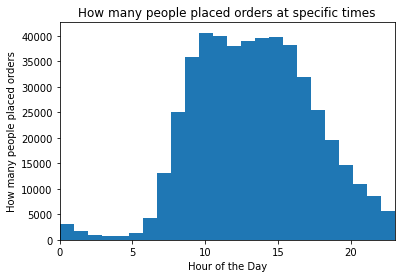

In [49]:
orders_df['order_hour_of_day'].plot(kind='hist', bins=24, xlim=(0,23), xlabel='Hour of the Day',
                                   ylabel='How many people placed orders', figsize=(6,4))
plt.ylabel('How many people placed orders')
plt.xlabel('Hour of the Day')
plt.title('How many people placed orders at specific times')
plt.grid(False)



there are a very solid amount of people coming in for groceries in the late morning to afternoon! 

### [A2] What time of day do people shop for groceries?

people typlically shop for groceries from 8 am - 5 pm and the peak hours of busiest time to shop is around 9 am to 3 pm 

### [A3] What day of the week do people shop for groceries?

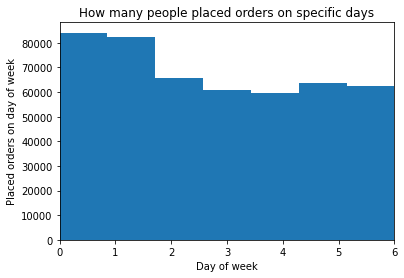

In [50]:


orders_df['order_dow'].plot(kind='hist', bins=7, xlim=(0,6), xlabel='Day of week',
                                   ylabel='Placed orders on day of week', figsize=(6,4))
plt.ylabel('Placed orders on day of week')
plt.xlabel('Day of week')
plt.title('How many people placed orders on specific days')
plt.grid(False)

Conclusion: most people do their shopping on sunday and monday which in the chart that is represented by 0, and 1. and people do the least amount of shopping on thursday which is represented by number 4. 

### [A4] How long do people wait until placing another order?

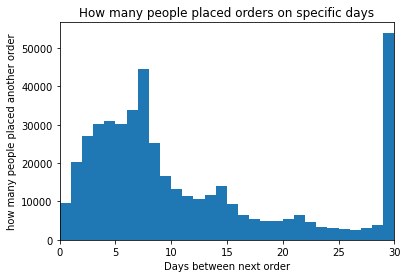

In [51]:
orders_df['days_since_prior_order'].plot(kind='hist', bins=30, xlim=(0,30), xlabel='days between next order',
                                   ylabel='how many people place another order', figsize=(6,4))

plt.ylabel('how many people placed another order')
plt.xlabel('Days between next order')
plt.title('How many people placed orders on specific days')
plt.grid(False)

30

# 
judging by the chart above most people place their orders on the the 30th and the 7th.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [52]:
weds_morning = orders_df[orders_df['order_dow'] == 3]

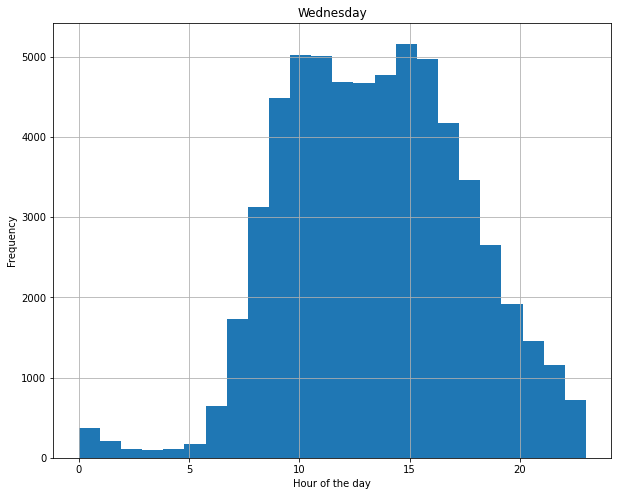

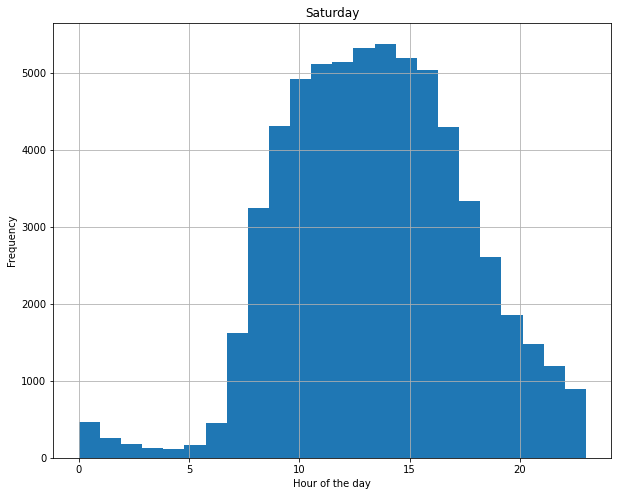

In [53]:
#print(orders_df[orders_df['order_dow'] == 3]['order_hour_of_day'])
orders_df[orders_df['order_dow'] == 3]['order_hour_of_day'].plot(kind='hist', bins=24, grid=True, figsize=(10,8))
plt.title('Wednesday')
plt.xlabel('Hour of the day')
plt.show()
#print(orders_df[orders_df['order_dow'] == 6]['order_hour_of_day'])
orders_df[orders_df['order_dow'] == 6]['order_hour_of_day'].plot(kind='hist', bins=24, grid=True, figsize=(10,8))
plt.title('Saturday')
plt.xlabel('Hour of the day')
plt.show()


# 
saturday and wedsnesday both have the same peak times. but saturdays peak is busier in their peak period. which means you would need an extra worker or two scheduled during your peak time to make the traffic flow as it would on a wedsnesday!

### [B2] What's the distribution for the number of orders per customer?

Could you please try to do this. 1) Group the dataframe by user_id, 2) Count the number of orders for each client, 3) 
Draw the results.
Now you are plotting the order_number which is not correct. Because of a customer had 5 orders, than in the dataframe we will 
have 5 entries - 1, 2, 3, 4 and 5. And we only need to take into account the 5.

In [67]:
#1) Group the dataframe by user_id,
customer_group = orders_df.groupby('user_id')#['order_number'].count().sort_values(ascending=False)
customer_group

In [68]:
#2) Count the number of orders for each client, 
customer_group_count = orders_df.groupby('user_id')['order_number'].count().sort_values(ascending=False) 
customer_group_count


user_id
149605    28
193164    26
78375     25
66664     24
134511    24
          ..
56616      1
56614      1
56611      1
56608      1
54291      1
Name: order_number, Length: 157437, dtype: int64

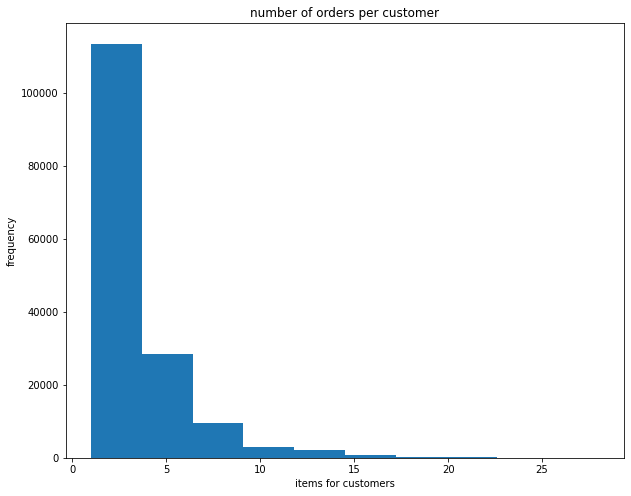

In [99]:
orders_df['user_id'].value_counts().plot(kind='hist', title='Number of Orders Per Customer', figsize=(10, 8))
plt.xlabel('Items For Customers')
plt.ylabel('Frequency')
plt.show()

#customer_group_count.plot(kind='hist', bins=20, grid=True,
                          #figsize=(10,8), title='number of orders per customer', xlabel:'number of items per customer')



In [93]:
#) Draw the results. Now you are plotting the order_number which is not correct. Because of a customer had 5 orders, than in the dataframe we will have 5 entries - 1, 2, 3, 4 and 5.
#And we only need to take into account the 5.
#customer_group_count_less_than = orders_df[orders_df.groupby('user_id')['order_number'].count().sort_values(ascending=False) <= 5]
#customer_group_count_less_than

In [55]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [78]:


#orders_df['user_id'].plot(kind='hist', bins=24, grid=True, figsize=(10,8))
#plt.title('Orders per customer')
#plt.xlabel('Order Amount')
#plt.show()
          


most customers ordered less than 20 items the bulk of their orders are between 1 and 5 items. 

### [B3] What are the top 20 popular products (display their id and name)?

In [59]:
popular_products = list(order_products_df['product_id'].value_counts().head(20).index)
print(popular_products)
print()
order_products_df.loc[popular_products]


[24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204, 5876, 8277, 40706]



,order_id,product_id,add_to_cart_order,reordered
24852,242513,48679,13,1
13176,699889,21903,3,1
21137,2714742,4605,5,1
21903,2010084,42625,30,1
47209,931323,1158,1,1
47766,3300860,7992,3,1
47626,1833161,34126,3,1
16797,1378264,10498,5,0
26209,448327,4138,3,1
27845,2015472,21903,11,0


In [60]:
products_df_new = product_df.merge(order_products_df, on='product_id', how='inner')

In [61]:
products_df_new['product_name'].value_counts().head(20)

banana                      66050
bag of organic bananas      53297
organic strawberries        37039
organic baby spinach        33971
organic hass avocado        29773
organic avocado             24689
large lemon                 21495
strawberries                20018
limes                       19690
organic whole milk          19600
organic raspberries         19197
organic yellow onion        15898
organic garlic              15292
organic zucchini            14584
organic blueberries         13879
cucumber kirby              13675
organic fuji apple          12544
organic lemon               12232
apple honeycrisp organic    11993
organic grape tomatoes      11781
Name: product_name, dtype: int64


I found the first 20 product_id 's using value counts. Then created a merge_df variable. which produced merging code of df's: products_df and order_products_df. so that let me filter the top 20 items.


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [62]:
products_df_new = product_df.merge(order_products_df, on='product_id')
print(products_df_new)

         product_id                product_name  aisle_id  department_id  \
0                 1  chocolate sandwich cookies        61             19   
1                 1  chocolate sandwich cookies        61             19   
2                 1  chocolate sandwich cookies        61             19   
3                 1  chocolate sandwich cookies        61             19   
4                 1  chocolate sandwich cookies        61             19   
...             ...                         ...       ...            ...   
4545002       49694     burrito- steak & cheese        38              1   
4545003       49694     burrito- steak & cheese        38              1   
4545004       49694     burrito- steak & cheese        38              1   
4545005       49694     burrito- steak & cheese        38              1   
4545006       49694     burrito- steak & cheese        38              1   

         order_id  add_to_cart_order  reordered  
0         1104373                 11 

In [63]:
new_variable = products_df_new[products_df_new['reordered']== 1]
print(new_variable)

         product_id                product_name  aisle_id  department_id  \
0                 1  chocolate sandwich cookies        61             19   
1                 1  chocolate sandwich cookies        61             19   
3                 1  chocolate sandwich cookies        61             19   
5                 1  chocolate sandwich cookies        61             19   
6                 1  chocolate sandwich cookies        61             19   
...             ...                         ...       ...            ...   
4544996       49693      spring water body wash       127             11   
4544997       49693      spring water body wash       127             11   
4544998       49694     burrito- steak & cheese        38              1   
4544999       49694     burrito- steak & cheese        38              1   
4545001       49694     burrito- steak & cheese        38              1   

         order_id  add_to_cart_order  reordered  
0         1104373                 11 

In [64]:
buy_order = new_variable.groupby('product_id')['product_name'].value_counts().sort_values(ascending=False).head(20)
print(buy_order)

product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
Name: product_name, dtype: int64


this chart is giving us the top 20 most reordered items
and this chart tells us that bananas are the number 1 most reordered item

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [65]:
reorder_products = order_products_df[order_products_df['reordered'] == 1]
# Merge the product dataframe and reorder products dataframe to get the product name for each item 
products_df_new = product_df.merge(reorder_products, on='product_id')
top_items = products_df_new.groupby('product_id')['product_name'].value_counts().sort_values(ascending=False).head(20)
print(top_items)


product_id  product_name            
24852       banana                      55763
13176       bag of organic bananas      44450
21137       organic strawberries        28639
21903       organic baby spinach        26233
47209       organic hass avocado        23629
47766       organic avocado             18743
27845       organic whole milk          16251
47626       large lemon                 15044
27966       organic raspberries         14748
16797       strawberries                13945
26209       limes                       13327
22935       organic yellow onion        11145
24964       organic garlic              10411
45007       organic zucchini            10076
49683       cucumber kirby               9538
28204       organic fuji apple           8989
8277        apple honeycrisp organic     8836
39275       organic blueberries          8799
5876        organic lemon                8412
49235       organic half & half          8389
Name: product_name, dtype: int64


there is a list of the top 20 items that people put in there cart. 
this tells us that bananas are the number one item which gets put in the cart 1st

Conclusion: In this data for instacart we have went through and found out the peak days where customers shop and which times they are most prevelant to shop at. which will allow us to make better staffing decisions to fullfill the high traffic times as well as we found the most popular items customers like to buy so we can put together different marketing strategies to push specific items and possibly give others more traction. 